In [12]:
from sklearn.datasets import make_classification


The function make_classification from the sklearn.datasets module in Python is used to generate a synthetic dataset for classification tasks. Here's a breakdown of the parameters you've specified:

**n_samples=1000:** This parameter specifies the total number of samples (or data points) in the generated dataset. In this case, the dataset will contain 1000 samples.

**n_features=10**: This parameter indicates the total number of features (or attributes) for each sample in the dataset. Here, each sample will have 10 features.

**n_informative=5**: This parameter specifies the number of informative features. Informative features are the ones that are actually useful for predicting the target class. In this case, 5 out of the 10 features will be informative.

**n_redundant**=5: This parameter indicates the number of redundant features. Redundant features are linear combinations of the informative features and do not add new information. Here, the remaining 5 features will be redundant.

**n_classes=2**: This parameter specifies the number of classes (or target labels) in the dataset. In this case, there will be 2 classes, which is typical for binary classification.

**random_state=1**: This parameter sets the seed for the random number generator, ensuring reproducibility of the dataset. Using the same random state will produce the same dataset each time you run the function.

How it works
The make_classification function will generate a dataset with 1000 samples, each having 10 features. Out of these 10 features:

5 features will be informative and directly related to the target variable.
5 features will be redundant, being linear combinations of the informative features.
The target variable will have 2 classes, and the random state of 1 ensures that you can reproduce the exact same dataset in future runs.

In [13]:
X,y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2, random_state=1)

In [14]:
X

array([[ 2.56999479, -0.13019997,  3.16075093, ..., -1.93094078,
         3.26130366,  2.05692145],
       [ 0.34129317,  2.51321418, -0.80416572, ...,  6.24734437,
        -1.92769365,  2.9503149 ],
       [ 2.27539972,  3.36561455,  0.17164362, ...,  2.74693781,
         0.13492444,  2.00339547],
       ...,
       [ 0.5234359 ,  1.90466429,  0.93243365, ...,  1.53945231,
         1.90646166,  1.99458587],
       [ 1.33747921,  3.25859684,  0.78792366, ...,  5.18788314,
        -0.82071083,  3.51411431],
       [-0.98534299,  0.83919047,  2.5820803 , ...,  3.04705685,
         0.66885641,  3.32838496]])

In [15]:
y.shape

(1000,)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

In [17]:
X_train.shape

(800, 10)

In [19]:
from sklearn.linear_model import LogisticRegression # use logistic regression model as this is a classification problem

model = LogisticRegression()

In [20]:
model.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

In [27]:
# evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [28]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[84 10]
 [25 81]]
0.825
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        94
           1       0.89      0.76      0.82       106

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.82       200



0.8714371738257727


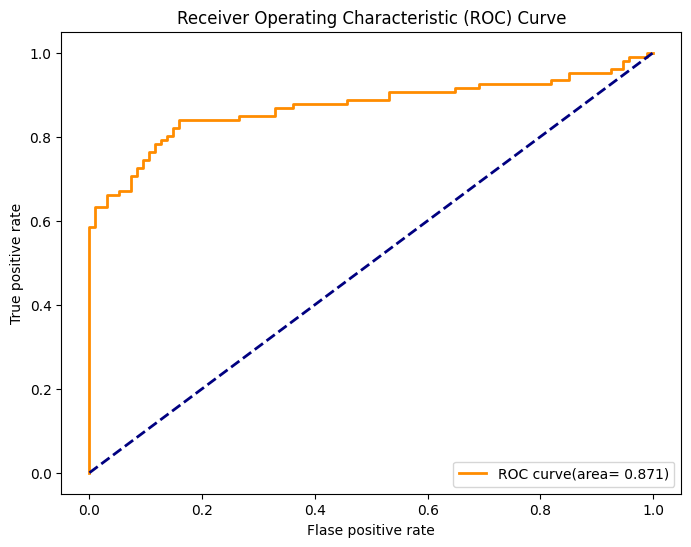

In [31]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
import matplotlib.pyplot as plt
y_pred_proba = model.predict_proba(X_test)[:,1] # column 1 # take only one column or class value
# as in ROC we take different cutoff hence only one
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(roc_auc_score(y_test, y_pred_proba))
roc_auc = auc(fpr, tpr)
# code  for plotting ROC
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',linewidth=2,label='ROC curve(area= %0.3f)'%roc_auc) # plot roc curve
plt.plot([0,1],[0,1], color='navy' ,linewidth=2, linestyle="--") # plot the diagonal line representing random guessing
# plt.xlim([0.0,1.0]) # set x-axis limit
# plt.ylim([0.0,1.05])# set y-axis limit
plt.xlabel('Flase positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right") # add legend to the lower right
plt.show()